In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
 
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, Dropout
 
import matplotlib.pyplot as plt
 
# load iris data
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=1)
 
# The known number of output classes.
num_classes = 3
 
#  label encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
 
# one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
 
# reshape 2D to 3D
x_train = x_train.reshape(100, 4, 1)
x_test = x_test.reshape(50, 4, 1)
 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 8,899
Trainable params: 8,899
Non-trainable params: 0
____________________________________________________

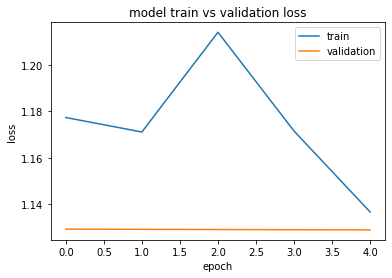

In [3]:
# build CNN model
model = Sequential()
model.add(Conv1D(64, 2, input_shape=(4, 1), activation='relu'))  # convolation
model.add(MaxPool1D(pool_size=2))  # pooling
model.add(Flatten())  # flatten
model.add(Dense(128, activation='relu'))  # fc
model.add(Dropout(0.3))  # dropout
model.add(Dense(num_classes, activation='softmax'))
 
# model compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()
 
batch_size = 128
epochs = 5
model = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=2,
                  validation_data=(x_test, y_test))
 
# draw loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()